# 03.DNN을 활용한 날씨 예측

1. 데이터 로드하고 전처리하기

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [2]:
# 데이터 로드
df = pd.read_csv('data/daily_weather.csv')
df

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


> - **number**: 행의 고유 번호입니다. 각 데이터 행을 고유하게 식별합니다.
> - **air_pressure_9am**: 오전 9시의 기압입니다.
> - **air_temp_9am**: 오전 9시의 기온입니다.
> - **avg_wind_direction_9am**: 오전 9시의 평균 풍향입니다.
> - **avg_wind_speed_9am**: 오전 9시의 평균 풍속입니다.
> - **max_wind_direction_9am**: 오전 9시의 최대 풍향입니다.
> - **max_wind_speed_9am**: 오전 9시의 최대 풍속입니다.
> - **rain_accumulation_9am**: 오전 9시까지의 강우량입니다.
> - **rain_duration_9am**: 오전 9시까지의 강우 지속 시간입니다.
> - **relative_humidity_9am**: 오전 9시의 상대 습도입니다.
> - **relative_humidity_3pm**: 오후 3시의 상대 습도입니다.



In [3]:
## 주요 특성 선택 (기온, 기압, 습도)
df = df[['air_temp_9am','air_pressure_9am','relative_humidity_9am','relative_humidity_3pm']]
df

,air_temp_9am,air_pressure_9am,relative_humidity_9am,relative_humidity_3pm
0,74.822000,918.060000,42.420000,36.160000
1,71.403843,917.347688,24.328697,19.426597
2,60.638000,923.040000,8.900000,14.460000
3,70.138895,920.502751,12.189102,12.742547
4,44.294000,921.160000,92.410000,76.740000
...,...,...,...,...
1090,63.104000,918.900000,26.020000,38.180000
1091,49.568000,918.710000,90.350000,73.340000
1092,71.096000,916.600000,45.590000,52.310000
1093,58.406000,912.600000,64.840000,58.280000


In [4]:
df = df.dropna()
df

,air_temp_9am,air_pressure_9am,relative_humidity_9am,relative_humidity_3pm
0,74.822000,918.060000,42.420000,36.160000
1,71.403843,917.347688,24.328697,19.426597
2,60.638000,923.040000,8.900000,14.460000
3,70.138895,920.502751,12.189102,12.742547
4,44.294000,921.160000,92.410000,76.740000
...,...,...,...,...
1090,63.104000,918.900000,26.020000,38.180000
1091,49.568000,918.710000,90.350000,73.340000
1092,71.096000,916.600000,45.590000,52.310000
1093,58.406000,912.600000,64.840000,58.280000


In [5]:
# 오전 9시 기온 데이터를 예측 목표로 설정하자.
target = df['air_temp_9am'].values
print(target)
print('-' * 50)
features = df[['air_pressure_9am', 'relative_humidity_9am', 'relative_humidity_3pm']].values
print(features)

# reshape(-1,1) : -1은 차원을 자동으로 계산, 전체데이터의 크기, 1은 하나의 컬럼을 뜻한다.
# t_data = t_data.reshape(-1,1)
# print(t_data)

[74.822      71.40384263 60.638      ... 71.096      58.406
 77.702     ]
--------------------------------------------------
[[918.06        42.42        36.16      ]
 [917.34768812  24.32869729  19.4265968 ]
 [923.04         8.9         14.46      ]
 ...
 [916.6         45.59        52.31      ]
 [912.6         64.84        58.28      ]
 [921.53        14.56        15.1       ]]


In [6]:
# 데이터 정규화
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

target_scaled = scaler_target.fit_transform(target.reshape(-1, 1)) 
features_scaled = scaler_features.fit_transform(features)

# 학습데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

### 2. DNN 모델 정의 및 학습

In [7]:
# 모델 정의
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.summary()

C:\Users\ICT05_01\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

print("학습 시작")
begin = time()

# 모델 학습하기
model.fit(X_train, y_train, epochs = 500, batch_size = 64, verbose = 0)

end = time()
print("총 학습시간  : {:.1f}초".format(end-begin))


학습 시작
총 학습시간  : 22.8초


### 3. 모델 평가 및 예측

In [9]:
# 모델 평가
loss = model.evaluate(X_test, y_test)

# 예측 수행 
## pred => 예측값
train_pred = model.predict(X_train) 
test_pred = model.predict(X_test)

# 예측값과 실제값의 스케일을 원래대로 되돌리기
train_pred = scaler_target.inverse_transform(train_pred)
y_train = scaler_target.inverse_transform(y_train)

test_pred = scaler_target.inverse_transform(test_pred)
y_test = scaler_target.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165  
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


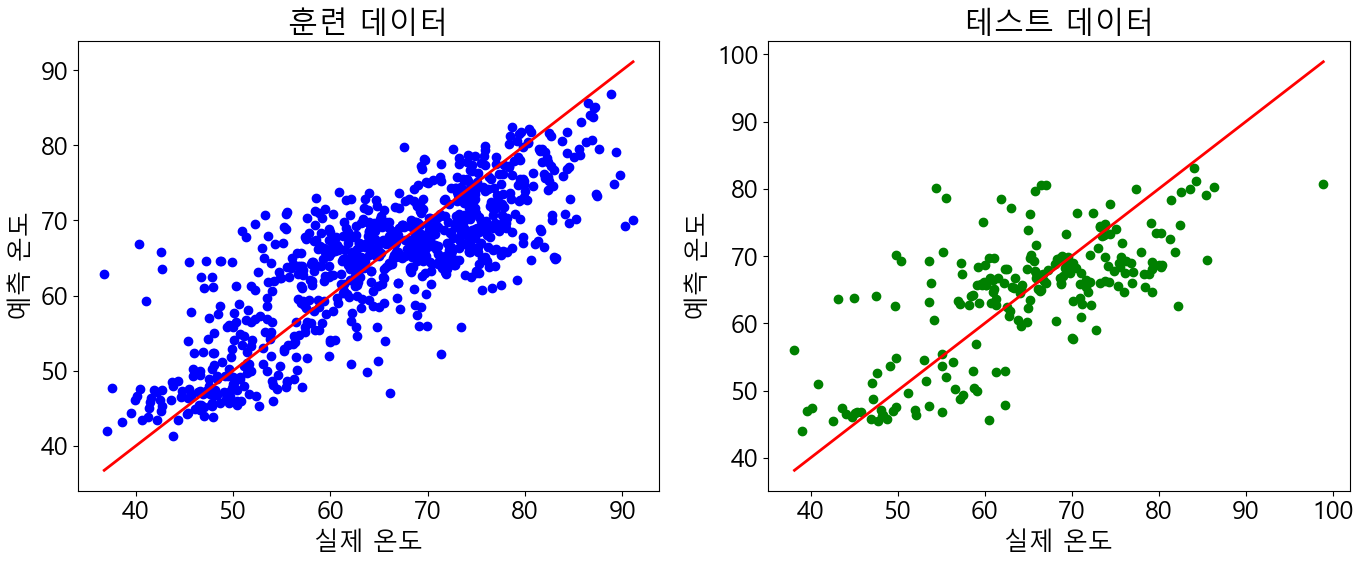

In [10]:
# 결과 시각화

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (32, 16)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_pred, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.title('훈련 데이터')
plt.xlabel('실제 온도')
plt.ylabel('예측 온도')

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('테스트 데이터')
plt.xlabel('실제 온도')
plt.ylabel('예측 온도')

plt.tight_layout()
plt.show()